In [1]:
import torch
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

In [2]:
# Device
if torch.cuda.is_available():
    device = "cuda"
elif torch.backends.mps.is_available():
    device = "mps"
else:
    device = "cpu"
print("Device Selected:", device)

Device Selected: mps


In [3]:
SEED = 1
torch.manual_seed(SEED)

if device == 'cuda':
    torch.cuda.manual_seed(SEED)

In [4]:
# Train data transformations
train_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,)),
])

# Test data transformations
test_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

In [5]:
train_data = datasets.MNIST('../data', train=True, download=True, transform=train_transforms)
test_data = datasets.MNIST('../data', train=False, download=True, transform=test_transforms)

In [6]:
batch_size = 64

kwargs = {'batch_size': batch_size, 'num_workers': 4, 'pin_memory': True}

train_loader = torch.utils.data.DataLoader(train_data, shuffle=True, **kwargs)
test_loader = torch.utils.data.DataLoader(test_data, shuffle=False, **kwargs)

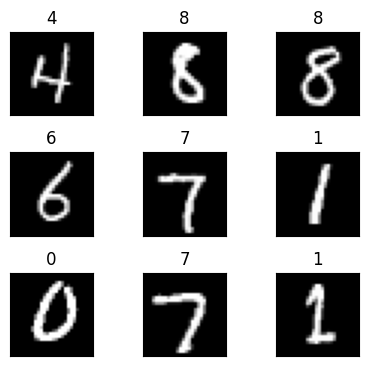

In [8]:
from utils import show_samples
show_samples(train_loader, figsize=(4, 4))

In [9]:
from model import Model1 as Net

model = Net()
model.summary(input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 28, 28]             288
              ReLU-2           [-1, 32, 28, 28]               0
            Conv2d-3           [-1, 32, 28, 28]           9,216
              ReLU-4           [-1, 32, 28, 28]               0
         MaxPool2d-5           [-1, 32, 14, 14]               0
            Conv2d-6           [-1, 64, 14, 14]          18,432
              ReLU-7           [-1, 64, 14, 14]               0
            Conv2d-8           [-1, 64, 14, 14]          36,864
              ReLU-9           [-1, 64, 14, 14]               0
        MaxPool2d-10             [-1, 64, 7, 7]               0
           Conv2d-11            [-1, 128, 7, 7]          73,728
             ReLU-12            [-1, 128, 7, 7]               0
AdaptiveAvgPool2d-13            [-1, 128, 1, 1]               0
           Conv2d-14            [-1, 25

In [10]:
from utils import train, test

In [11]:
model = Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

criterion = F.nll_loss
num_epochs = 15

for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  train(model, device, train_loader, optimizer, criterion)
  test(model, device, test_loader, criterion)

Epoch 1


Train: Batch Loss=0.1114 Batch_id=937 Average Loss=1.5874 Accuracy=41.27: 100%|██████████| 938/938 [00:19<00:00, 47.52it/s]


Test set: Average loss: 0.2646, Accuracy: 9163/10000 (91.63%)

Epoch 2


Train: Batch Loss=0.0157 Batch_id=937 Average Loss=0.1702 Accuracy=94.77: 100%|██████████| 938/938 [00:16<00:00, 57.44it/s]


Test set: Average loss: 0.0930, Accuracy: 9692/10000 (96.92%)

Epoch 3


Train: Batch Loss=0.1558 Batch_id=937 Average Loss=0.0969 Accuracy=97.01: 100%|██████████| 938/938 [00:15<00:00, 58.86it/s]


Test set: Average loss: 0.0618, Accuracy: 9795/10000 (97.95%)

Epoch 4


Train: Batch Loss=0.0197 Batch_id=937 Average Loss=0.0734 Accuracy=97.70: 100%|██████████| 938/938 [00:15<00:00, 59.03it/s]


Test set: Average loss: 0.0603, Accuracy: 9808/10000 (98.08%)

Epoch 5


Train: Batch Loss=0.0071 Batch_id=937 Average Loss=0.0573 Accuracy=98.17: 100%|██████████| 938/938 [00:16<00:00, 56.80it/s]


Test set: Average loss: 0.0419, Accuracy: 9857/10000 (98.57%)

Epoch 6


Train: Batch Loss=0.0099 Batch_id=937 Average Loss=0.0489 Accuracy=98.47: 100%|██████████| 938/938 [00:15<00:00, 58.74it/s]


Test set: Average loss: 0.0364, Accuracy: 9883/10000 (98.83%)

Epoch 7


Train: Batch Loss=0.0293 Batch_id=937 Average Loss=0.0414 Accuracy=98.66: 100%|██████████| 938/938 [00:15<00:00, 58.89it/s]


Test set: Average loss: 0.0392, Accuracy: 9889/10000 (98.89%)

Epoch 8


Train: Batch Loss=0.0349 Batch_id=937 Average Loss=0.0355 Accuracy=98.87: 100%|██████████| 938/938 [00:16<00:00, 58.27it/s]


Test set: Average loss: 0.0350, Accuracy: 9874/10000 (98.74%)

Epoch 9


Train: Batch Loss=0.0127 Batch_id=937 Average Loss=0.0313 Accuracy=99.02: 100%|██████████| 938/938 [00:15<00:00, 59.15it/s]


Test set: Average loss: 0.0416, Accuracy: 9860/10000 (98.60%)

Epoch 10


Train: Batch Loss=0.0027 Batch_id=937 Average Loss=0.0289 Accuracy=99.06: 100%|██████████| 938/938 [00:16<00:00, 57.92it/s]


Test set: Average loss: 0.0222, Accuracy: 9929/10000 (99.29%)

Epoch 11


Train: Batch Loss=0.0004 Batch_id=937 Average Loss=0.0260 Accuracy=99.19: 100%|██████████| 938/938 [00:15<00:00, 58.99it/s]


Test set: Average loss: 0.0385, Accuracy: 9888/10000 (98.88%)

Epoch 12


Train: Batch Loss=0.0004 Batch_id=937 Average Loss=0.0246 Accuracy=99.23: 100%|██████████| 938/938 [00:16<00:00, 57.67it/s]


Test set: Average loss: 0.0274, Accuracy: 9910/10000 (99.10%)

Epoch 13


Train: Batch Loss=0.0976 Batch_id=937 Average Loss=0.0226 Accuracy=99.28: 100%|██████████| 938/938 [00:16<00:00, 55.35it/s]


Test set: Average loss: 0.0242, Accuracy: 9927/10000 (99.27%)

Epoch 14


Train: Batch Loss=0.0029 Batch_id=937 Average Loss=0.0212 Accuracy=99.34: 100%|██████████| 938/938 [00:16<00:00, 56.64it/s]


Test set: Average loss: 0.0198, Accuracy: 9936/10000 (99.36%)

Epoch 15


Train: Batch Loss=0.0122 Batch_id=937 Average Loss=0.0180 Accuracy=99.43: 100%|██████████| 938/938 [00:16<00:00, 57.72it/s]


Test set: Average loss: 0.0286, Accuracy: 9909/10000 (99.09%)



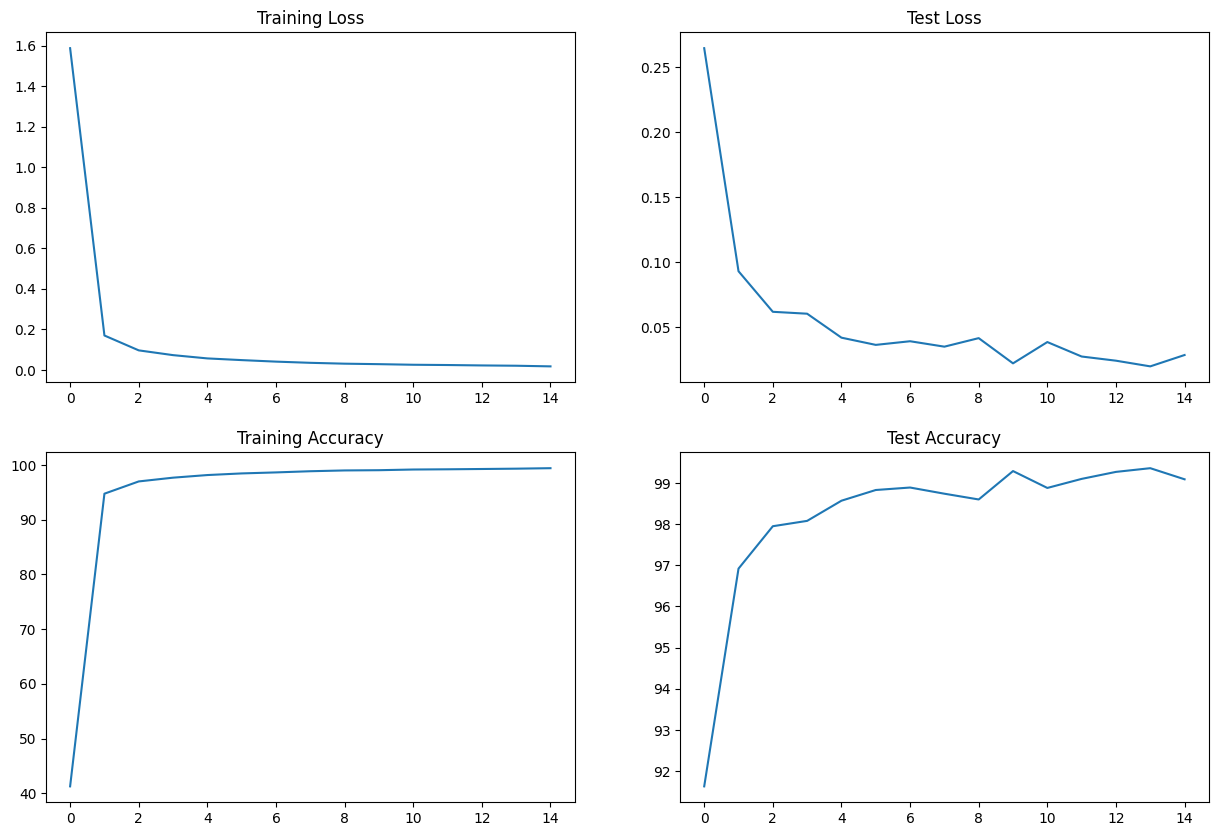

In [12]:
from utils import plot_stats
plot_stats()

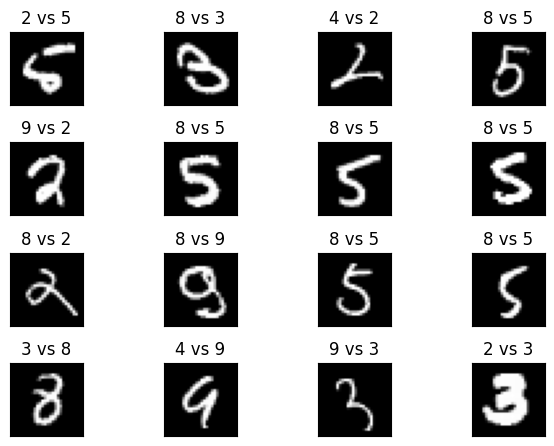

In [13]:
from utils import show_incorrect
show_incorrect() # Predicted vs Actual